In [50]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

from scipy.stats import norm
from scipy.optimize import fsolve
from pylab import mpl
# from mpl_tookits.mplot3d import Axes3D

In [51]:
np.random.seed(1031)
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
cf.go_offline()

BlackScholes
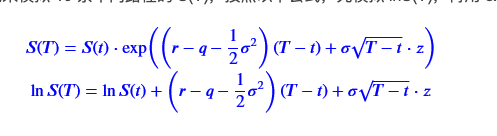

In [52]:
(S0, r, q, T, sigma) = (1, 0.02, 0.01, 1, 0.5)
(Nsim, Nt) = (10, 1000)
t = np.linspace(0, T, Nt)
dt = np.diff(t)

In [53]:
z = np.random.randn(Nsim, Nt-1)

In [54]:
A = (r-q-0.5*(sigma)**2)*dt + sigma * (z*np.sqrt(dt))

In [55]:
lnS0 = np.tile(np.log(S0), (Nsim,1))

In [56]:
lnS = lnS0 + np.cumsum(A, axis=1)

In [57]:
lnS = np.hstack((lnS0, lnS))

In [58]:
S = np.exp(lnS)

In [59]:
S

array([[1.        , 0.98692629, 0.95961635, ..., 1.13028231, 1.08185297,
        1.08227451],
       [1.        , 0.99467372, 1.00283917, ..., 1.43197951, 1.43296055,
        1.42322243],
       [1.        , 0.99725947, 1.01628281, ..., 0.96725765, 0.95660173,
        0.94536796],
       ...,
       [1.        , 0.99236322, 0.9918788 , ..., 0.83159289, 0.84425524,
        0.84595332],
       [1.        , 1.01188841, 1.01119241, ..., 2.0183635 , 1.96811366,
        1.94539263],
       [1.        , 1.01193459, 1.02927226, ..., 1.34665228, 1.39121391,
        1.38818071]])

In [60]:
label = [ x + '' + str(y) for x, y in zip(['path'] * Nsim, np.arange(1, Nsim+1))]

In [61]:
df = pd.DataFrame(S.T, index=t, columns=label)

In [62]:
df.iplot(xTitle='t', yTitle='S', title='Black-Scholes', theme='ggplot')

In [63]:
def blackscholes(s0, k0, r, q, T, sigma, omega) : 
    discount = np.exp(-r*T)
    forward = s0*np.exp((r-q)*T)
    moneyness = np.log(forward/K)
    vol_sqrt_T = sigma*np.sqrt(T)
    d1 = moneyness / vol_sqrt_T + 0.5*vol_sqrt_T
    d2 = d1 - vol_sqrt_T
    V = omega * discount * (forward * norm.cdf(omega*d1) - K*norm.cdf(omega*d2))
    return V

In [64]:
(S0, K, r, q, T, sigma, omega) = (100, 95, 0.01, 0, 1, 0.1, 1)
V_BS = blackscholes(S0, K, r, q, T, sigma, omega)
V_BS

7.545870893948695

In [65]:
def get_BS_IV(price, S0, K, r, q, T, omega) : 
    x0 = 0.2
    obj = lambda x: blackscholes(S0, K, r, q, T, x, omega) - price
    x = fsolve(obj, x0)
    return x[0]

In [66]:
get_BS_IV(V_BS, S0, K, r, q, T, omega)

0.09999999999999983

Bachelier model
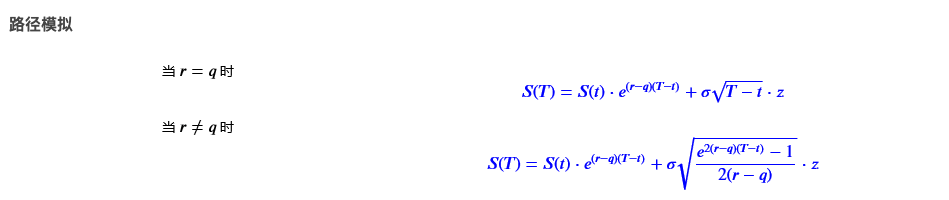

In [67]:
(S0, r, q, T, sigma) = (1, 0.02, 0.01, 10, 0.5)
(Nsim, Nt) = (10, 1000)
t = np.linspace(0, T, Nt)
dt = np.diff(t)
z = np.random.randn(Nsim, Nt-1)

In [68]:
A = np.exp((r-q)*t)

In [69]:
if r==q : 
    B = sigma*(z*np.sqrt(dt)) / A[1:]
else : 
    B = sigma*(z*np.sqrt((np.exp(2*(r-q)*dt)-1)/(2*(r-q))))/A[1:]

In [70]:
discS0 = np.tile(S0/A[0], (Nsim,1))

In [71]:
discS = discS0 + np.cumsum(B, axis=1)

In [72]:
discS = np.hstack((discS0, discS))

In [73]:
S = discS * A

In [74]:
label = [ x + '' + str(y) for x, y in zip(['path'] * Nsim, np.arange(1, Nsim+1))]
df = pd.DataFrame(S.T, index=t, columns=label)
df.iplot(xTitle='t', yTitle='S', title='Black-Scholes', theme='ggplot')

In [80]:
def bachelier(S0=100, K=100, r=0.01, q=0.01, T=1, sigma=0.2, omega=1) :
    discount = np.exp(-r*T)
    forward = S0 * np.exp((r-q)*T)
    moneyness = forward - K 
    if r == q : 
        vol_sqrt_T = sigma * np.sqrt(T)
    else : 
        vol_sqrt_T = sigma * np.sqrt((np.exp(2*(r-q)*T)-1)/(2*(r-q)))
    d = moneyness / vol_sqrt_T
    V = discount * (omega*moneyness*norm.cdf(omega*d) + vol_sqrt_T*norm.pdf(d))
    return V

In [81]:
(S0, K, r, q, T, sigma, omega) = (100, 95, 0.01, 0, 1, 0.1, 1) 
V_BL = bachelier(S0, K, r, q,T, sigma, omega)

In [83]:
V_BL

5.945265793829019

In [84]:
V_BL = bachelier(S0, K, r, q, T, sigma*S0, omega)

In [86]:
V_BL

7.630422479463851

In [88]:
(S0, K) = (-37, 20)
V_BL = bachelier(S0, K, r, q,T, sigma*np.abs(S0), omega)
V_BL

1.246987875662463e-54

In [90]:
VP_BL = V_BL + K*np.exp(-r*T) - S0

In [91]:
VP_BL

56.80099667498337